In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
classes[y_train[9][0]]

'cat'

In [ ]:
def show(i):
  plt.figure(figsize=(10,2))
  plt.imshow(X_train[i])

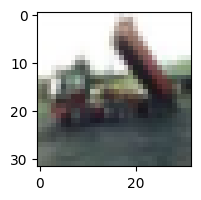

In [ ]:
show(2)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [ ]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1500,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train_categorical,epochs=75)

Epoch 1/75
1563/1563 [==============================] - 12s 5ms/step - loss: 1.8111 - accuracy: 0.3562
Epoch 2/75
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6225 - accuracy: 0.4290
Epoch 3/75
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5418 - accuracy: 0.4564
Epoch 4/75
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4793 - accuracy: 0.4797
Epoch 5/75
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4311 - accuracy: 0.4975
Epoch 6/75
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3888 - accuracy: 0.5127
Epoch 7/75
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3490 - accuracy: 0.5271
Epoch 8/75
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3167 - accuracy: 0.5393
Epoch 9/75
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2825 - accuracy: 0.5512
Epoch 10/75
1563/1563 [==============================] - 8s 5ms/step - loss: 1.25

In [ ]:
np.argmax(model.predict(X_test_scaled)[5])

313/313 [==============================] - 1s 2ms/step


6

In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[5])]

313/313 [==============================] - 1s 2ms/step


'frog'

In [ ]:
classes[y_test[5][0]]

'frog'

In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 9s 5ms/step - loss: 1.8134 - accuracy: 0.3532
10.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('/cPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 116s 73ms/step - loss: 1.8134 - accuracy: 0.3540
2min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.14.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_test[0]

9

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

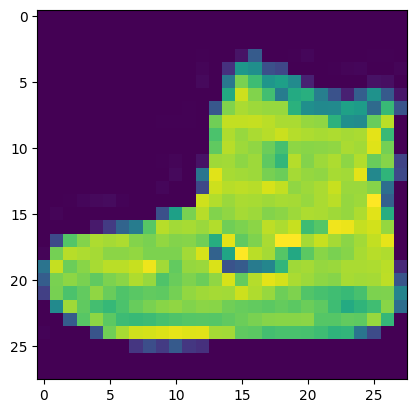

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train[3]

3

In [ ]:
class_names[y_train[3]]

'Dress'

In [ ]:
y_train[4]

0

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
y_train_category = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test_category = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [ ]:
y_train_category[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
28*28

784

In [ ]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(750,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_1.fit(X_train_scaled,y_train_category,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4750 - accuracy: 0.8280
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3558 - accuracy: 0.8691
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3194 - accuracy: 0.8823
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2977 - accuracy: 0.8899
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2807 - accuracy: 0.8953
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2630 - accuracy: 0.9004
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2523 - accuracy: 0.9048
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2397 - accuracy: 0.9087
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2304 - accuracy: 0.9120
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.220

In [ ]:
model_1.evaluate(X_test_scaled)

313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
np.argmax(model_1.predict(X_test_scaled)[8])

313/313 [==============================] - 1s 3ms/step


5

In [ ]:
class_names[np.argmax(model_1.predict(X_test_scaled)[8])]

313/313 [==============================] - 1s 3ms/step


'Sandal'

In [ ]:
class_names[y_test[8]]

'Sandal'